
In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [1]:
import pandas as pd

In [2]:
# Import the titanic dataset here
data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")

## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [3]:
# Code here
df_titanic["class"].value_counts()

df_titanic["type"] = df_titanic["class"].map({
    "1st": "passenger",
    "2nd": "passenger",
    "3rd": "passenger",
    "victualling crew": "crew",
    "engineering crew": "crew",
    "deck crew": "crew", 
    "restaurant staff": "crew"
})

passenger = df_titanic["type"] == "passenger"
df_titanic_passenger = df_titanic[passenger]

pd.crosstab(df_titanic_passenger["class"], df_titanic_passenger["embarked"], normalize = True)

embarked,B,C,Q,S
class,,,,
1st,0.002278,0.108580,0.002278,0.132878
2nd,0.004556,0.019742,0.005315,0.186029
3rd,0.000000,0.077449,0.085801,0.375095


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [4]:
# Code here
#columns aka where they embarked in
embarked_class_dist = pd.crosstab(df_titanic_passenger["class"], df_titanic_passenger["embarked"], normalize= "columns")

#index aka what class they are 
class_embarked_dist = pd.crosstab(df_titanic_passenger["class"], df_titanic_passenger["embarked"], normalize = "index")

#proportion of 3rd class in southampton

print(embarked_class_dist["S"])

#proportation of southampton in 3rd class 

class_embarked_dist["S"]

class
1st    0.191466
2nd    0.268053
3rd    0.540481
Name: S, dtype: float64


class
1st    0.540123
2nd    0.862676
3rd    0.696756
Name: S, dtype: float64

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

<Axes: xlabel='class'>

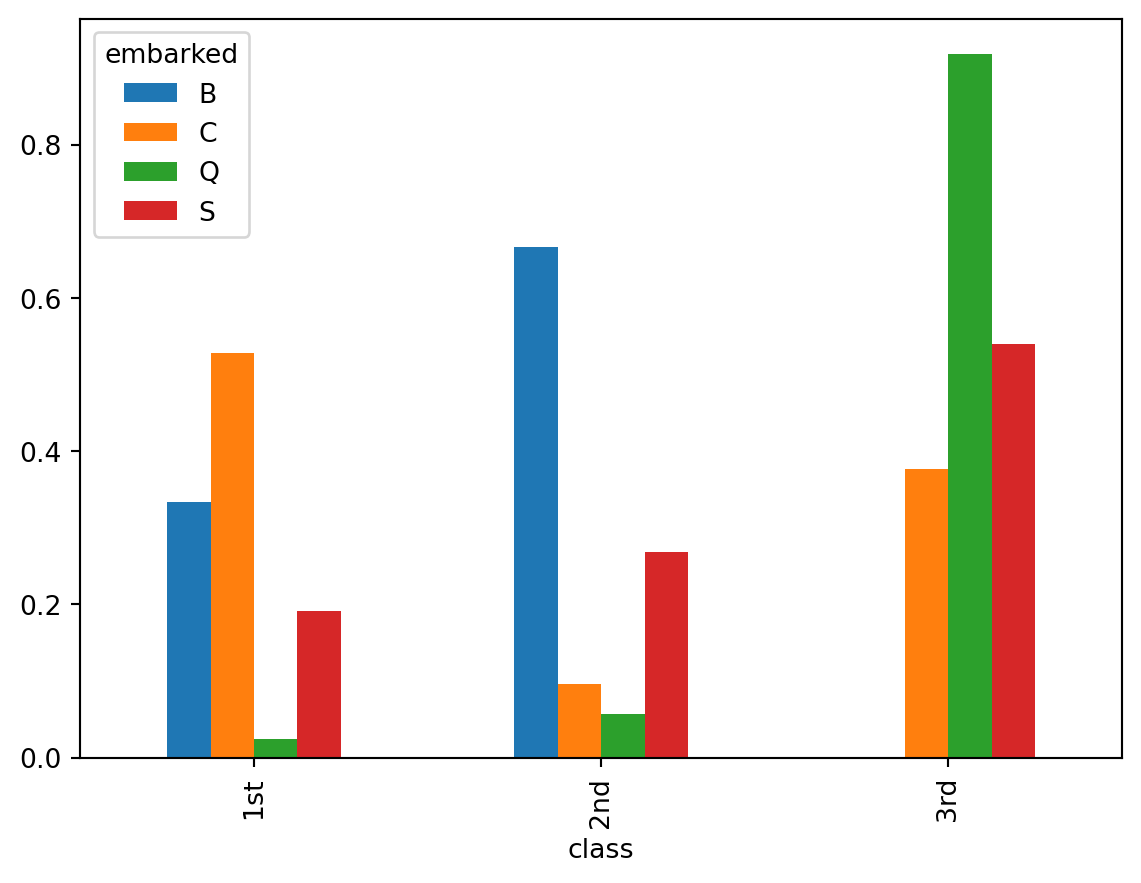

In [5]:
# Code here
embarked_class_dist.plot(kind = "bar")
 
